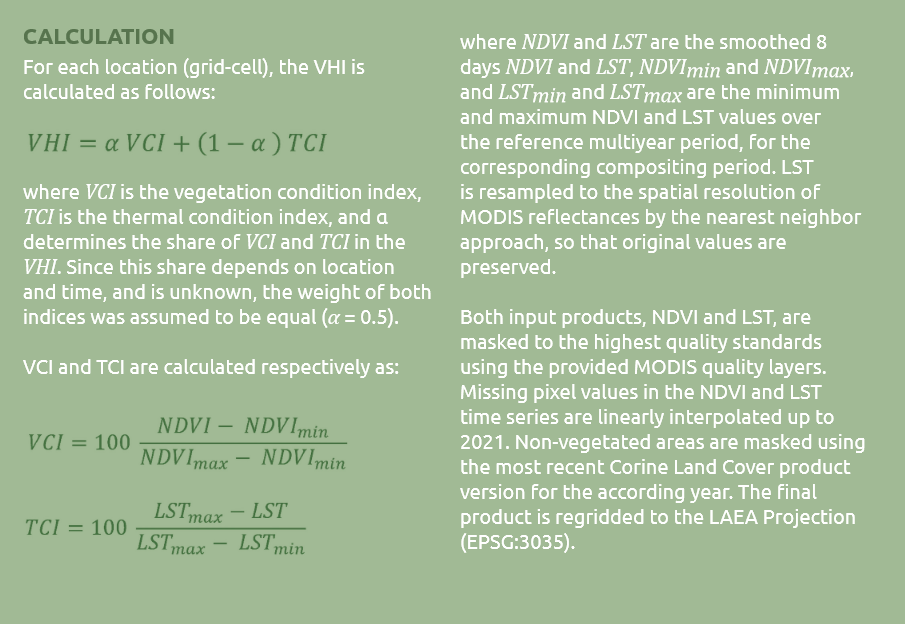

In [48]:
import openeo

conn = openeo.connect('https://dev.openeo.eurac.edu').authenticate_basic(username="openeo",password="changeme")

In [38]:
conn.describe_account()

{'user_id': '-1010579340',
 'name': 'openeo',
 'storage': {'present': False},
 'budget': {'present': False},
 'links': None}

In [37]:
conn.list_collections()

[{'stac_version': '1.0.0',
  'stac_extensions': ['https://stac-extensions.github.io/raster/v1.1.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json',
   'https://stac-extensions.github.io/item-assets/v1.0.0/schema.json',
   'https://stac-extensions.github.io/view/v1.0.0/schema.json',
   'https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/datacube/v2.2.0/schema.json'],
  'type': 'Collection',
  'id': 'SENTINEL2_L2A',
  'title': 'Sentinel-2 Level-2A',
  'description': 'Global Sentinel-2 data from the Multispectral Instrument (MSI) onboard Sentinel-2',
  'keywords': ['sentinel', 'earth observation', 'esa'],
  'deprecated': False,
  'license': 'proprietary',
  'providers': [{'processingExtension': {},
    'name': 'ESA',
    'url': 'https://earth.esa.int/web/guest/home',
    'roles': ['producer']},
   {'processingExtension': {},
    'name': 'Sinergise',
    'url': 'https://registry.opendata.aws/sentinel-2/',
    'roles': ['processor']},
   {'processingExtension': {},
    'name': 'AWS',
    'url': 'http://sentinel-pds.s3-website.eu-central-1.amazonaws.com/',
    'roles': ['host']},
   {'processingExtension': {},
    'name': 'Element 84',
    'url': 'https://element84.com',
    'roles': ['processor']}],
  'extent': {'spatial': {'bbox': [[-180, -90, 180, 90]]},
   'temporal': {'interval': [['2015-06-27T10:25:31.456Z', None]]}},
  'links': [{'rel': 'self',
    'href': 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a',
    'type': 'application/json'},
   {'rel': 'cite-as',
    'href': 'https://doi.org/10.5270/S2_-742ikth',
    'title': 'Copernicus Sentinel-2 MSI Level-2A (L2A) Bottom-of-Atmosphere Radiance'},
   {'rel': 'license',
    'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice',
    'title': 'proprietary'},
   {'rel': 'parent',
    'href': 'https://earth-search.aws.element84.com/v1',
    'type': 'application/json'},
   {'rel': 'root',
    'href': 'https://earth-search.aws.element84.com/v1',
    'type': 'application/json',
    'title': 'Earth Search by Element 84'},
   {'rel': 'items',
    'href': 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items',
    'type': 'application/geo+json'},
   {'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'href': 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/queryables',
    'type': 'application/schema+json'},
   {'rel': 'aggregate',
    'href': 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/aggregate',
    'type': 'application/json',
    'method': 'GET'},
   {'rel': 'aggregations',
    'href': 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/aggregations',
    'type': 'application/json'}],
  'cube:dimensions': {'x': {'type': 'spatial',
    'axis': 'x',
    'extent': [-180, 180]},
   'y': {'type': 'spatial', 'axis': 'y', 'extent': [-90, 90]},
   'time': {'type': 'temporal',
    'extent': ['2015-06-27 10:25:31.456000+00:00', 'None']},
   'bands': {'type': 'bands',
    'values': ['aot',
     'blue',
     'coastal',
     'green',
     'nir',
     'nir08',
     'nir09',
     'red',
     'rededge1',
     'rededge2',
     'rededge3',
     'scl',
     'swir16',
     'swir22',
     'wvp']}},
  'summaries': {'processingExtension': {},
   'constellation': ['sentinel-2'],
   'platform': ['sentinel-2a', 'sentinel-2b'],
   'instruments': ['msi'],
   'gsd': [10.0, 20.0, 60.0],
   'eo:bands': [{'centerWwavelength': 0.443,
     'name': 'coastal',
     'common_name': 'coastal',
     'description': 'Coastal aerosol (band 1)',
     'center_wavelength': 0.443,
     'full_width_half_max': 0.027},
    {'centerWwavelength': 0.49,
     'name': 'blue',
     'common_name': 'blue',
     'description': 'Blue (band 2)',
     'center_wavelength': 0.49,
     'full_width_half_max': 0.098},
    {'centerWwavelength': 0.56,
     'name': 'green',
     'common_name': 'green',
     'description': 'G

### VCI - Vegetation Condition Index

We need to compute the minimum and maximum NDVI over the time series

In [18]:
spatial_extent = {
          "west": 13.3652612,
          "east": 16.5153015,
          "south": 45.4236367,
          "north": 46.8639623
        }

temporal_extent = ["2020-01-01","2020-12-31"]
bands = ["red","nir","scl"]
s2_cube = conn.load_collection("SENTINEL2_L2A",
                              spatial_extent=spatial_extent,
                              temporal_extent=temporal_extent,
                              bands=bands).resample_spatial(resolution=0.125, projection="EPSG:4326")

## TODO: the next metadata steps are necessary due to missing auto extraction of metadata when using load_stac
# s2_cube.metadata = s2_cube.metadata.add_dimension("time", label=None, type="temporal")
s2_cube.metadata = s2_cube.metadata.rename_dimension("y","latitude")
s2_cube.metadata = s2_cube.metadata.rename_dimension("x","longitude")
# s2_cube = s2_cube.rename_dimension(source="latitude",target="lat").rename_dimension(source="longitude",target="lon")
scl = s2_cube.band("scl")
vegetation_mask = (scl == 4)
s2_cube_masked = s2_cube.filter_bands(["red","nir"]).mask(vegetation_mask)

B04 = s2_cube_masked.band("red")
B08 = s2_cube_masked.band("nir")
ndvi = (B08 - B04) / (B08 + B04)

ndvi_monthly_median = ndvi.aggregate_temporal_period("month",reducer="median")
ndvi_max = ndvi_monthly_median.max_time().add_dimension(name="bands",type="bands",label="NDVI_MAX")
ndvi_min = ndvi_monthly_median.min_time().add_dimension(name="bands",type="bands",label="NDVI_MIN")
ndvi_min_max = ndvi_max.merge_cubes(ndvi_min)
ndvi_min_max = ndvi_min_max.rename_dimension(source="latitude",target="y").rename_dimension(source="longitude",target="x")
ndvi_min_max_cog = ndvi_min_max.save_result(format="GTiff")

We create a batch job and run it. The computed result will be available as STAC Collection and reused in the workflow.

In [19]:
job = ndvi_min_max_cog.create_job(title="VHI_VCI_ndvi_monthly_median_min_max_cog_0125")
job.start_job()

<BatchJob job_id='abeac843-5a2c-47f4-9943-aa73d0e2089b'>

In [39]:
conn.job("abeac843-5a2c-47f4-9943-aa73d0e2089b")

<BatchJob job_id='abeac843-5a2c-47f4-9943-aa73d0e2089b'>

The resulting STAC Collection URL is https://stac.openeo.eurac.edu/api/v1/pgstac/collections/abeac843-5a2c-47f4-9943-aa73d0e2089b

We can now reload it in openEO using the `load_stac` process:

In [27]:
ndvi_min_max = conn.load_stac("https://stac.openeo.eurac.edu/api/v1/pgstac/collections/abeac843-5a2c-47f4-9943-aa73d0e2089b",bands=["NDVI_MIN","NDVI_MAX"]).drop_dimension("time")

Now that we have the yearly min and max values for the NDVI, we can compute the NDVI for a specific time range, the one for which we want to compute the VHI.

In [28]:
temporal_extent = ["2020-07-01","2020-08-01"]

s2_cube = conn.load_stac(url="https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a",
                              spatial_extent=spatial_extent,
                              temporal_extent=temporal_extent,
                              bands=bands).resample_spatial(resolution=0.125, projection="EPSG:4326")

s2_cube.metadata = s2_cube.metadata.add_dimension("time", label=None, type="temporal")
scl = s2_cube.band("scl")
vegetation_mask = (scl == 4)
s2_cube_masked = s2_cube.filter_bands(["red","nir"]).mask(vegetation_mask)

B04 = s2_cube_masked.band("red")
B08 = s2_cube_masked.band("nir")
ndvi = (B08 - B04) / (B08 + B04)
ndvi_monthly_median = ndvi.aggregate_temporal_period("month",reducer="median")

The NDVI is combined with the min and max values to compute the Vegetation Condition Index (VCI).

In [29]:
ndvi_min = ndvi_min_max.band("NDVI_MIN")
ndvi_max = ndvi_min_max.band("NDVI_MAX")

diff = ndvi_max - ndvi_min

VCI = ndvi_monthly_median.merge_cubes(ndvi_min,overlap_resolver="subtract").merge_cubes(diff,overlap_resolver="divide")
VCI = VCI * 100

VCI_cog = VCI.add_dimension(type="bands",name="bands",label="VCI").save_result(format="GTiff")

In [30]:
job = VCI_cog.create_job(title="VCI_test")
job.start_job()

<BatchJob job_id='2b2cfe53-b90b-463e-b4fe-109d5b9c8550'>

In [40]:
conn.job("2b2cfe53-b90b-463e-b4fe-109d5b9c8550")

<BatchJob job_id='2b2cfe53-b90b-463e-b4fe-109d5b9c8550'>

The resulting VCI STAC Collection URL is https://stac.openeo.eurac.edu/api/v1/pgstac/collections/2b2cfe53-b90b-463e-b4fe-109d5b9c8550

### TCI - Thermal Condition Index

We need to compute the minimum and maximum temperature over the time series

In [41]:
spatial_extent = {
          "west": 13.3652612,
          "east": 16.5153015,
          "south": 45.4236367,
          "north": 46.8639623
        }

temporal_extent = ["2020-01-01","2020-12-31"]
bands = ["air_temperature_at_2_metres"]
era5 = conn.load_collection("ERA5_REANALYSIS",
                              spatial_extent=spatial_extent,
                              temporal_extent=temporal_extent,
                              bands=bands)

t_max = era5.max_time().rename_labels(dimension="bands",target=["T_MAX"])
t_min = era5.min_time().rename_labels(dimension="bands",target=["T_MIN"])
t_min_max = t_max.merge_cubes(t_min)

Now that we have the yearly min and max values for the temperature, we can compute the TCI.

In [42]:
temporal_extent = ["2020-07-01","2020-08-01"]

era5 = conn.load_collection("ERA5_REANALYSIS",
                              spatial_extent=spatial_extent,
                              temporal_extent=temporal_extent,
                              bands=bands).drop_dimension("bands").aggregate_temporal_period("month",reducer="mean")

t_min = t_min_max.band("T_MIN")
t_max = t_min_max.band("T_MAX")

TCI = (((era5 * -1) + t_max) / (t_max - t_min)) * 100

### VHI - Vegetation Health Index

Combine the VCI and TCI indexes to compute VHI

In [43]:
VCI = conn.load_stac("https://stac.openeo.eurac.edu/api/v1/pgstac/collections/2b2cfe53-b90b-463e-b4fe-109d5b9c8550",bands=["VCI"]).drop_dimension("bands").drop_dimension("time")
VCI.metadata = VCI.metadata.add_dimension("time", label=None, type="temporal")
VCI.metadata = VCI.metadata.add_dimension("latitude", label=None, type="spatial")
VCI.metadata = VCI.metadata.add_dimension("longitude", label=None, type="spatial")
VCI = VCI.rename_dimension(source="latitude",target="lat").rename_dimension(source="longitude",target="lon")
VCI_aligned = VCI.resample_cube_spatial(target=TCI,method="average")

alpha = 0.5

VHI = alpha * VCI_aligned + (1 - alpha) * TCI
VHI = VHI.add_dimension(type="bands",name="bands",label="VHI")
VHI = VHI.rename_dimension(source="lat",target="y").rename_dimension(source="lon",target="x")

In [44]:
VHI_tiff = VHI.save_result(format="GTiff")
VHI_tiff

In [45]:
job = VHI_tiff.create_job(title="VHI")
job.start_job()

<BatchJob job_id='b1066e8a-370a-4dd3-9d2e-a6f0451a2cec'>

In [49]:
job = conn.job("b1066e8a-370a-4dd3-9d2e-a6f0451a2cec")
job

<BatchJob job_id='b1066e8a-370a-4dd3-9d2e-a6f0451a2cec'>

The resulting VHI STAC Collection URL is https://stac.openeo.eurac.edu/api/v1/pgstac/collections/b1066e8a-370a-4dd3-9d2e-a6f0451a2cec

In the next cell there should be a rendered version of the STAC Browser showing the result (at this link https://radiantearth.github.io/stac-browser/#/external/stac.openeo.eurac.edu/api/v1/pgstac/collections/b1066e8a-370a-4dd3-9d2e-a6f0451a2cec?.language=en). It works when running the code in Visual Studio but not in Jupyter.

<iframe src="https://radiantearth.github.io/stac-browser/#/external/stac.openeo.eurac.edu/api/v1/pgstac/collections/b1066e8a-370a-4dd3-9d2e-a6f0451a2cec?.language=en" width="100%" height="600px"></iframe>